In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**DATA PREPROCESSING AND EDA**




In [2]:
df = pd.read_csv('/content/new_visual.csv')
df

,ID,Timestamp,road1,road2,road3,road4,open
0,1,2023-05-18 13:00:00Z,6.963440,4.656665,8.812369,10.568286,2
1,2,2023-05-18 13:00:01Z,6.926880,4.313331,8.624739,10.136571,2
2,3,2023-05-18 13:00:02Z,6.890321,3.969996,8.437108,9.704857,2
3,4,2023-05-18 13:00:03Z,6.853761,3.626662,8.249477,9.273143,2
4,5,2023-05-18 13:00:04Z,6.817201,3.283327,8.061847,8.841428,2
...,...,...,...,...,...,...,...
1495,1496,2023-05-22 13:04:55Z,14.000000,0.000000,14.000000,14.000000,2
1496,1497,2023-05-22 13:04:56Z,14.000000,0.000000,14.000000,14.000000,2
1497,1498,2023-05-22 13:04:57Z,14.000000,0.000000,14.000000,14.000000,2
1498,1499,2023-05-22 13:04:58Z,14.000000,0.000000,14.000000,14.000000,2


In [3]:
df.describe()

,ID,road1,road2,road3,road4,open
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,6.930891,6.692540,5.401110,7.129614,2.480000
std,433.157015,5.110195,5.522542,5.241951,5.383865,1.135984
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,375.750000,2.245330,0.957342,0.000000,1.680319,1.000000
50%,750.500000,6.747574,5.887979,3.668679,6.789509,2.000000
75%,1125.250000,11.565761,12.943152,9.959522,13.396257,4.000000
max,1500.000000,14.000000,14.000000,14.000000,14.000000,4.000000


In [4]:
df.isnull().sum()

ID           0
Timestamp    0
road1        0
road2        0
road3        0
road4        0
open         0
dtype: int64

#**REMOVAL OF OUTLIERS**

In [5]:
z_scores = np.abs((df - df.mean()) / df.std())
threshold = 18
outlier_indices = np.where(z_scores > threshold)
print(outlier_indices)
df2 = df.drop(outlier_indices[0])
df2

(array([], dtype=int64), array([], dtype=int64))


<ipython-input-5-7a6281e9f456>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())
<ipython-input-5-7a6281e9f456>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())


,ID,Timestamp,road1,road2,road3,road4,open
0,1,2023-05-18 13:00:00Z,6.963440,4.656665,8.812369,10.568286,2
1,2,2023-05-18 13:00:01Z,6.926880,4.313331,8.624739,10.136571,2
2,3,2023-05-18 13:00:02Z,6.890321,3.969996,8.437108,9.704857,2
3,4,2023-05-18 13:00:03Z,6.853761,3.626662,8.249477,9.273143,2
4,5,2023-05-18 13:00:04Z,6.817201,3.283327,8.061847,8.841428,2
...,...,...,...,...,...,...,...
1495,1496,2023-05-22 13:04:55Z,14.000000,0.000000,14.000000,14.000000,2
1496,1497,2023-05-22 13:04:56Z,14.000000,0.000000,14.000000,14.000000,2
1497,1498,2023-05-22 13:04:57Z,14.000000,0.000000,14.000000,14.000000,2
1498,1499,2023-05-22 13:04:58Z,14.000000,0.000000,14.000000,14.000000,2


#**BOX PLOT**

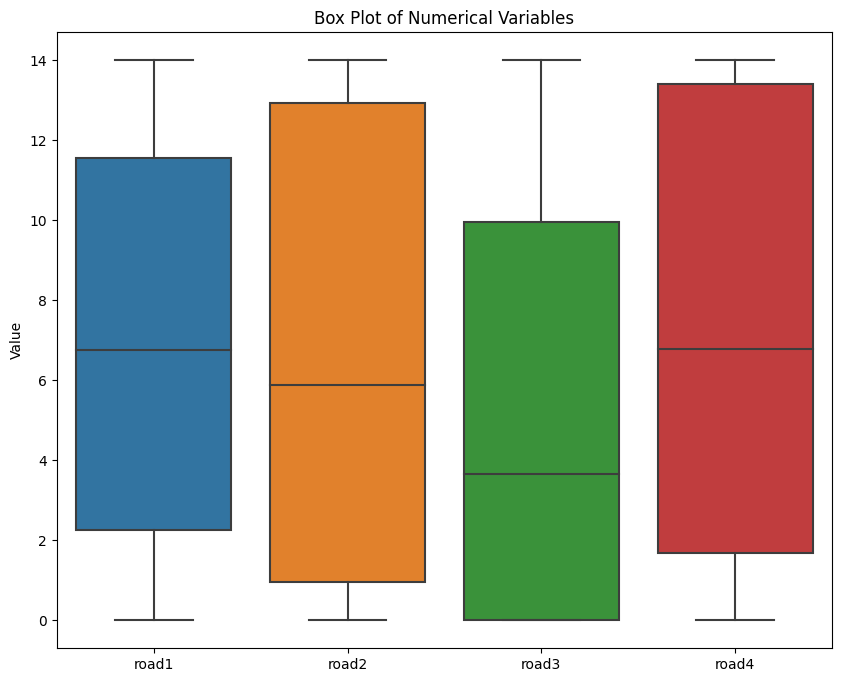

In [6]:
numerical_cols = ['road1', 'road2', 'road3', 'road4']
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plot of Numerical Variables')
plt.ylabel('Value')
plt.show()

#**Removing samples with values 0**

In [7]:
df1= df[(df!= 0).all(axis=1)]
df1= df1.reset_index(drop=True)
df1

,ID,Timestamp,road1,road2,road3,road4,open
0,1,2023-05-18 13:00:00Z,6.963440,4.656665,8.812369,10.568286,2
1,2,2023-05-18 13:00:01Z,6.926880,4.313331,8.624739,10.136571,2
2,3,2023-05-18 13:00:02Z,6.890321,3.969996,8.437108,9.704857,2
3,4,2023-05-18 13:00:03Z,6.853761,3.626662,8.249477,9.273143,2
4,5,2023-05-18 13:00:04Z,6.817201,3.283327,8.061847,8.841428,2
...,...,...,...,...,...,...,...
648,1421,2023-05-22 13:03:40Z,5.694227,1.030675,2.431194,14.000000,2
649,1422,2023-05-22 13:03:41Z,6.081687,0.787440,2.917433,14.000000,2
650,1423,2023-05-22 13:03:42Z,6.469148,0.544204,3.403672,14.000000,2
651,1424,2023-05-22 13:03:43Z,6.856609,0.300969,3.889911,14.000000,2


#**RESAMPLING**

In [8]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1.set_index('Timestamp', inplace=True)

In [9]:
df1

,ID,road1,road2,road3,road4,open
Timestamp,,,,,,
2023-05-18 13:00:00+00:00,1,6.963440,4.656665,8.812369,10.568286,2
2023-05-18 13:00:01+00:00,2,6.926880,4.313331,8.624739,10.136571,2
2023-05-18 13:00:02+00:00,3,6.890321,3.969996,8.437108,9.704857,2
2023-05-18 13:00:03+00:00,4,6.853761,3.626662,8.249477,9.273143,2
2023-05-18 13:00:04+00:00,5,6.817201,3.283327,8.061847,8.841428,2
...,...,...,...,...,...,...
2023-05-22 13:03:40+00:00,1421,5.694227,1.030675,2.431194,14.000000,2
2023-05-22 13:03:41+00:00,1422,6.081687,0.787440,2.917433,14.000000,2
2023-05-22 13:03:42+00:00,1423,6.469148,0.544204,3.403672,14.000000,2


In [10]:
df1.drop(columns=['ID'],inplace=True)

In [11]:
df1

,road1,road2,road3,road4,open
Timestamp,,,,,
2023-05-18 13:00:00+00:00,6.963440,4.656665,8.812369,10.568286,2
2023-05-18 13:00:01+00:00,6.926880,4.313331,8.624739,10.136571,2
2023-05-18 13:00:02+00:00,6.890321,3.969996,8.437108,9.704857,2
2023-05-18 13:00:03+00:00,6.853761,3.626662,8.249477,9.273143,2
2023-05-18 13:00:04+00:00,6.817201,3.283327,8.061847,8.841428,2
...,...,...,...,...,...
2023-05-22 13:03:40+00:00,5.694227,1.030675,2.431194,14.000000,2
2023-05-22 13:03:41+00:00,6.081687,0.787440,2.917433,14.000000,2
2023-05-22 13:03:42+00:00,6.469148,0.544204,3.403672,14.000000,2


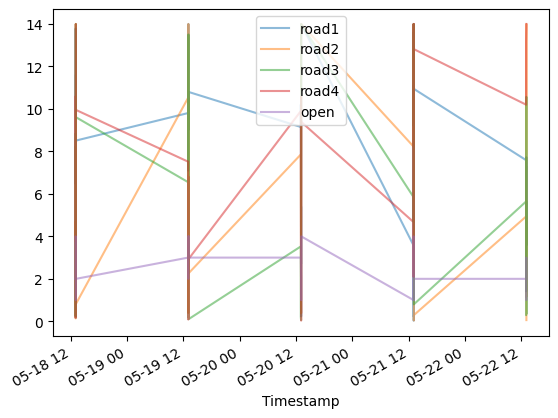

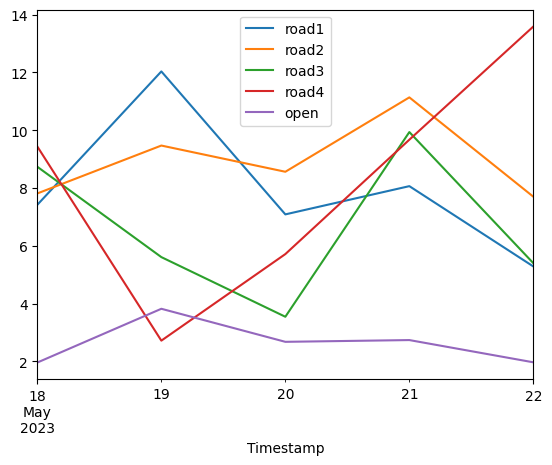

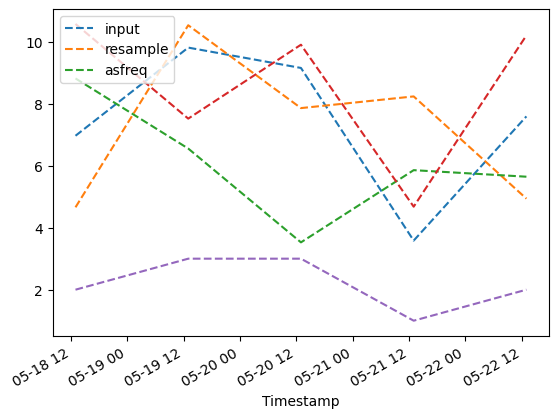

In [12]:
import seaborn as sns
df1.plot(alpha=0.5, style='-')#input
df1.resample('D').mean().plot(style="-")#Resampled data
df1.asfreq('D').plot(style='--');#Frequency at Day End
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

#**ROLLING WINDOW**

Rolling Window is used to visualize the rolling statistics of a time series or any sequential data. Here, rolling mean is calculated to smooth the representation of the data and helps to identify the overall trend or pattern over time. Rolling standard deviation is used to find the outliers.  <p>

#**For Road1**

In [13]:
df1

,road1,road2,road3,road4,open
Timestamp,,,,,
2023-05-18 13:00:00+00:00,6.963440,4.656665,8.812369,10.568286,2
2023-05-18 13:00:01+00:00,6.926880,4.313331,8.624739,10.136571,2
2023-05-18 13:00:02+00:00,6.890321,3.969996,8.437108,9.704857,2
2023-05-18 13:00:03+00:00,6.853761,3.626662,8.249477,9.273143,2
2023-05-18 13:00:04+00:00,6.817201,3.283327,8.061847,8.841428,2
...,...,...,...,...,...
2023-05-22 13:03:40+00:00,5.694227,1.030675,2.431194,14.000000,2
2023-05-22 13:03:41+00:00,6.081687,0.787440,2.917433,14.000000,2
2023-05-22 13:03:42+00:00,6.469148,0.544204,3.403672,14.000000,2


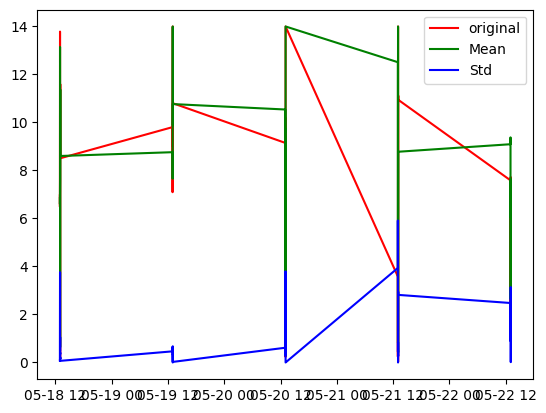

In [14]:
rolling = df1.rolling(window=7)
rolling_mean = rolling.mean()
rolling_std = rolling.std()

plt.plot(df1.index,df1['road1'], color='r', label='original')
plt.plot(rolling_mean.index, rolling_mean['road1'], color='g', label='Mean')
plt.plot(rolling_std.index, rolling_std['road1'], color='b', label='Std')
plt.legend(title='Rolling window for road1')
plt.legend(loc='upper right')
plt.show()

**Analysis for Road1:**<p>
The red line in the above plot represents the original data in ['road1'] with respect to the day. Green line denotes the mean of ['road1'] and blue line denotes the Standard deviation of ['road1'] which will be respective to the day. If the standard deviation is high then it is said to be having high variance compared to the mean. If it exceeds the threshold which is set to 18 then it is considered as outlier.


#**For Road2**

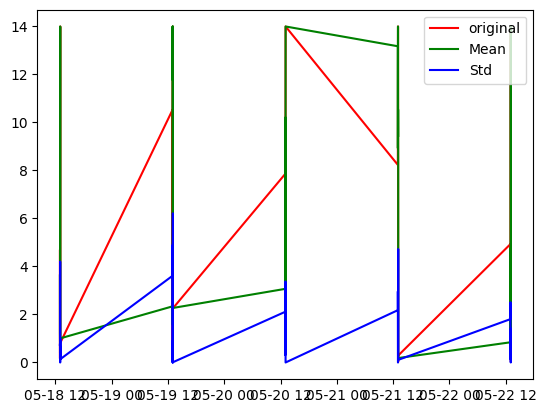

In [15]:
rolling = df1.rolling(window=7)
rolling_mean = rolling.mean()
rolling_std = rolling.std()

plt.plot(df1.index,df1['road2'], color='r', label='original')
plt.plot(rolling_mean.index, rolling_mean['road2'], color='g', label='Mean')
plt.plot(rolling_std.index, rolling_std['road2'], color='b', label='Std')
plt.legend(title='Rolling window for road2')
plt.legend(loc='upper right')
plt.show()

#**For Road3**

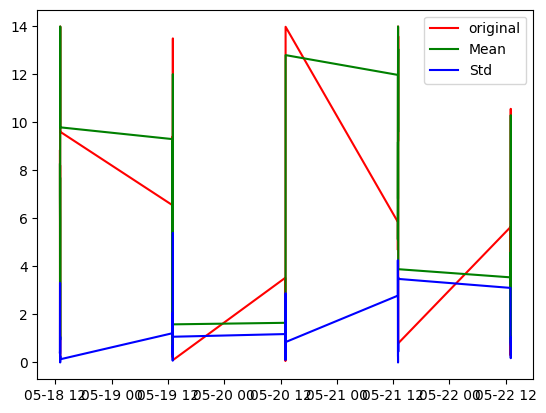

In [16]:
rolling = df1.rolling(window=7)
rolling_mean = rolling.mean()
rolling_std = rolling.std()

plt.plot(df1.index,df1['road3'], color='r', label='original')
plt.plot(rolling_mean.index, rolling_mean['road3'], color='g', label='Mean')
plt.plot(rolling_std.index, rolling_std['road3'], color='b', label='Std')
plt.legend(title='Rolling window for road3')
plt.legend(loc='upper right')
plt.show()

#**For Road4**

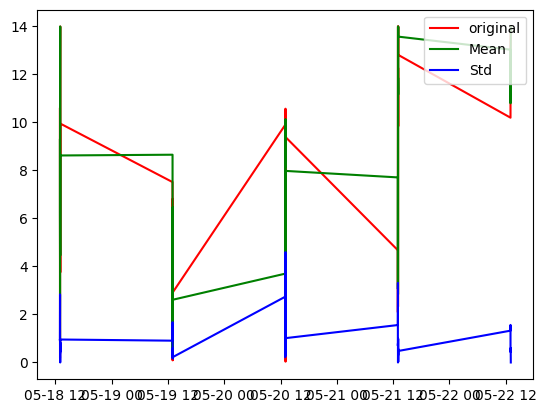

In [17]:
rolling = df1.rolling(window=7)
rolling_mean = rolling.mean()
rolling_std = rolling.std()

plt.plot(df1.index,df1['road4'], color='r', label='original')
plt.plot(rolling_mean.index, rolling_mean['road4'], color='g', label='Mean')
plt.plot(rolling_std.index, rolling_std['road4'], color='b', label='Std')
plt.legend(title='Rolling window for road4')
plt.legend(loc='upper right')
plt.show()

#**CORRELATION HEATMAP**


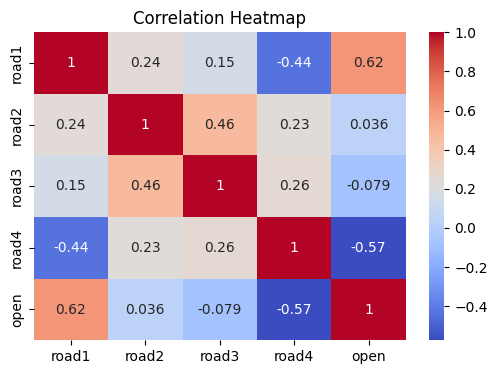

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(df1[['road1', 'road2', 'road3', 'road4', 'open']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#**ANALYSIS:**<P>
The values in the heatmap ranges from -1 to 1 where -1 indicates strong negative correlation, +1 indicates strong positive correlation and 0 indicates that there is no correlation between the attributes. Negative Correlation defines an inverse relationship between the attributes and positive correlation defines a direct relationship between the attributes.<p>
Here the negative correlation is not beyond -0.8 and the positive correlation is not beyond 0.7.So,the range is bounded.


#**PAIR PLOT**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


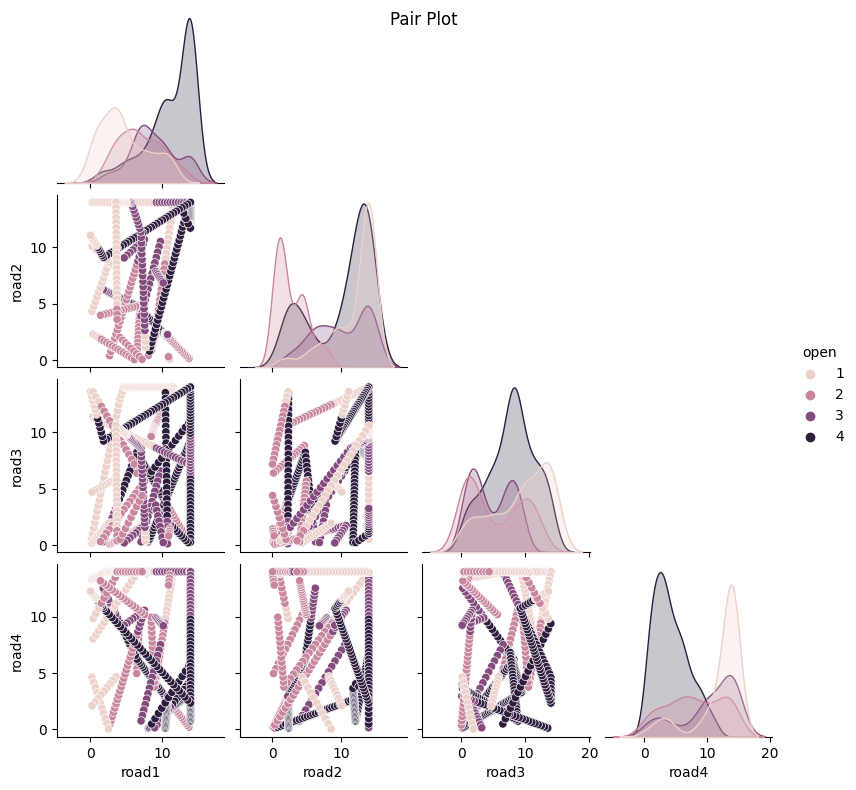

In [19]:
sns.pairplot(data=df1, vars=numerical_cols, hue='open',corner=True,size=2)
plt.suptitle('Pair Plot')
plt.show()

#**RELATIONAL PLOT**

#**For Road1**

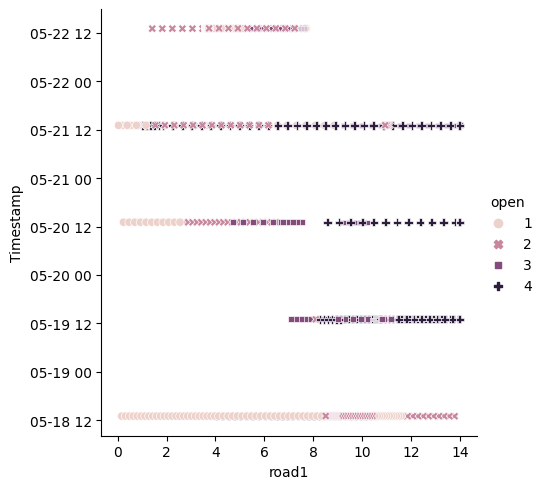

In [20]:
sns.relplot(data=df1, x="road1", y="Timestamp", hue="open", style="open")
plt.show()

#**For Road2**

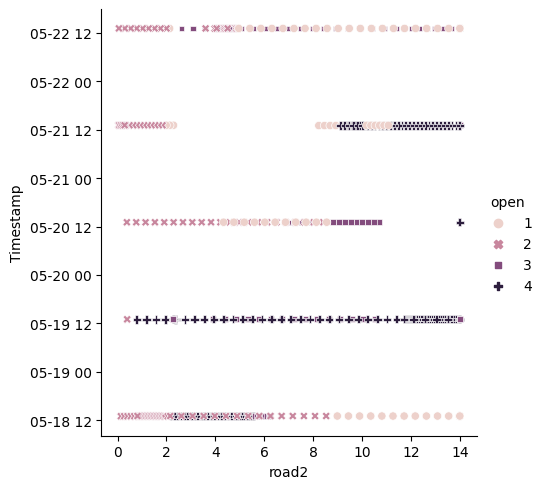

In [21]:
sns.relplot(data=df1, x="road2", y="Timestamp", hue="open", style="open")
plt.show()

#**For Road3**

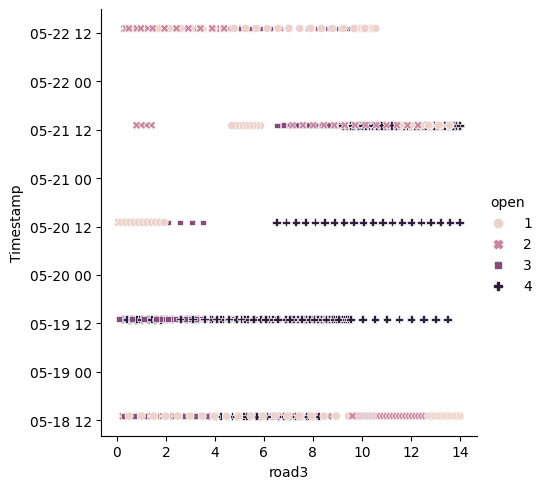

In [22]:
sns.relplot(data=df1, x="road3", y="Timestamp", hue="open", style="open")
plt.show()

#**For Road4**

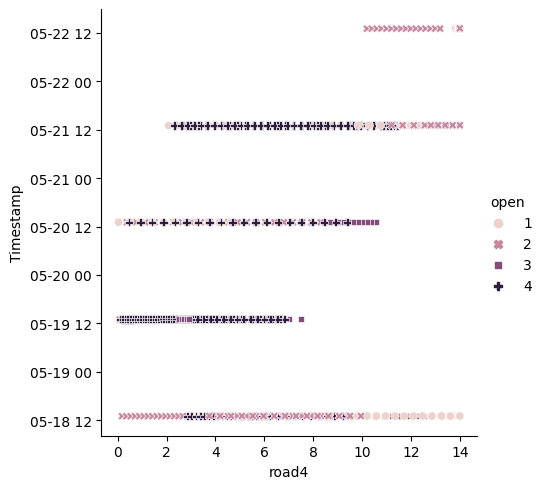

In [23]:
sns.relplot(data=df1, x="road4", y="Timestamp", hue="open", style="open")
plt.show()

#**MACHINE LEARNING MODELS**

# **DECISION TREE**

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [25]:
 X = df1[['road1', 'road2', 'road3', 'road4']]
 y = df1['open']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 94.65648854961832


In [29]:
print(clf.predict([[40, 10, 6, 1]]))

[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#**RANDOM FOREST**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rlf = RandomForestClassifier()
rlf.fit(X_train, y_train)
y_pred = rlf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 95.41984732824427


In [33]:
print(rlf.predict([[11.2, 5.3, 6.8, 4.6]]))

[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#**Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
llf = LogisticRegression()
llf.fit(X_train, y_train)
y_pred = llf.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 72.51908396946564


In [37]:
print(llf.predict([[11.2, 5.3, 6.8, 4.6]]))

[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#**SVC**

In [38]:
from sklearn.svm import SVC

In [39]:
slf = SVC()
slf.fit(X_train, y_train)
y_pred = slf.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 87.02290076335878


In [41]:
print(slf.predict([[11.2, 5.3, 6.8, 4.6]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[4]


#**KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
klf = KNeighborsClassifier()
klf.fit(X_train, y_train)
y_pred = klf.predict(X_test)

In [44]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 96.94656488549617


In [45]:
print(klf.predict([[11.2, 5.3, 6.8, 4.6]]))

[4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
